# Pandas: Advanced Topics (Part 1)

## Removing Columns

In [ ]:
import pandas as pd

In [ ]:
summer = pd.read_csv("summer.csv")

In [ ]:
summer.head()

In [ ]:
summer.drop(columns = "Sport")

In [ ]:
summer.head()

In [ ]:
summer.drop(columns = ["Sport", "Discipline"], inplace=True)

In [ ]:
summer.drop(labels = "Event", axis = "columns", inplace= True)

In [ ]:
#del summer["Event"]

In [ ]:
summer.head()

In [ ]:
summer = pd.read_csv("summer.csv")

In [ ]:
summer.head()

In [ ]:
summer = summer.loc[:,["Year", "City", "Athlete", "Country", "Gender", "Medal"]]

In [ ]:
summer.head()

## Removing Rows

In [ ]:
import pandas as pd

In [ ]:
summer = pd.read_csv("summer.csv", index_col = "Athlete")

In [ ]:
summer.head(10)

In [ ]:
summer.drop(index = "HAJOS, Alfred")

In [ ]:
summer.drop(index = ["HAJOS, Alfred","HERSCHMANN, Otto"], inplace = True)

In [ ]:
summer.head()

In [ ]:
summer.drop(labels = "DRIVAS, Dimitrios", axis = 0,  inplace = True)

In [ ]:
summer.head()

In [ ]:
summer = summer.loc[summer.Year == 1996]

In [ ]:
summer.head()

In [ ]:
summer = pd.read_csv("summer.csv", index_col = "Athlete")

In [ ]:
summer.head()

In [ ]:
mask1 = summer.Year == 1996
mask2 = summer.Sport == "Aquatics"

In [ ]:
summer = summer.loc[~(mask1 | mask2)]

In [ ]:
summer.head()

In [ ]:
(summer.Year == 1996).value_counts()

In [ ]:
1996 in summer.Year.values

In [ ]:
summer.Sport.isin(["Aquatics"]).any()

In [ ]:
(summer.Sport == "Aquatics").any()

## Adding new Columns to a DataFrame

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.head()

In [ ]:
titanic["Zeros"] = "Zero"

In [ ]:
titanic.head()

In [ ]:
titanic.Ones = 1

In [ ]:
titanic.head()

In [ ]:
titanic.Ones

## Arithmetic Operations

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.head()

In [ ]:
titanic.info()

In [ ]:
titanic.age.fillna(titanic.age.mean(), inplace = True)

In [ ]:
titanic.head(10)

### Add/Sub/Mul/Div of Columns

In [ ]:
titanic.sibsp + titanic.parch

In [ ]:
titanic.sibsp.add(titanic.parch)

In [ ]:
titanic["no_relat"] = titanic.sibsp.add(titanic.parch)

In [ ]:
titanic.head()

In [ ]:
sales = pd.read_csv("sales.csv", index_col = 0)

In [ ]:
sales

In [ ]:
sales.Mon + sales.Thu

In [ ]:
sales.Mon.add(sales.Thu, fill_value=0)

In [ ]:
sales["perc_Bonus"] = [0.12, 0.15, 0.10, 0.20]

In [ ]:
sales

In [ ]:
sales.Thu * sales.perc_Bonus

In [ ]:
sales.Thu.mul(sales.perc_Bonus, fill_value=0)

In [ ]:
sales.iloc[:, :-1].sum(axis = 1).mul(sales.perc_Bonus)

In [ ]:
sales["Bonus"] = sales.iloc[:, :-1].sum(axis = 1).mul(sales.perc_Bonus)

In [ ]:
sales

### Add/Sub/Mul/Div with Scalar Value

In [ ]:
titanic.head()

In [ ]:
1912 - titanic.age

In [ ]:
titanic["YoB"] = titanic.age.sub(1912).mul(-1)

In [ ]:
titanic.head()

In [ ]:
fx_rate = 1.1

In [ ]:
titanic["EUR_fare"] = titanic.fare.div(fx_rate)

In [ ]:
titanic.head()

In [ ]:
titanic.drop(columns = ["sibsp", "parch", "deck", "YoB", "EUR_fare"], inplace =True)

In [ ]:
titanic.head()

In [ ]:
sales

In [ ]:
fixed_costs = 5

In [ ]:
sales.iloc[:, :-2].sub(fixed_costs, fill_value = 0)

In [ ]:
perc_Bonus = 0.1

In [ ]:
sales.iloc[:, :-2].mul(perc_Bonus, fill_value = 0)

In [ ]:
sales.iloc[:,:-2]

In [ ]:
lot_size = 10
bonus_per_lot = 1.25

In [ ]:
sales.iloc[:, :-2].floordiv(lot_size, fill_value = 0).mul(bonus_per_lot).sum(axis = 1)

## Creating DataFrames from Scratch with pd.DataFrame()

In [ ]:
import pandas as pd

### Having Columns in place

In [ ]:
player = ["Lionel Messi", "Cristiano Ronaldo", "Neymar Junior", "Kylian Mbappe", "Manuel Neuer"]

In [ ]:
nationality = ["Argentina", "Portugal", "Brasil", "France", "Germany"]

In [ ]:
club = ["FC Barcelona", "Juventus FC", "Paris SG", "Paris SG", "FC Bayern" ]

In [ ]:
world_champion = [False, False, False, True, True]

In [ ]:
height = [1.70, 1.87, 1.75, 1.78, 1.93]

In [ ]:
goals = [45, 44, 28, 21, 0]

In [ ]:
dic = {"Player":player, "Nationality":nationality, "Club":club, 
        "World_Champion":world_champion, "Height":height, "Goals_2018":goals
       }

In [ ]:
dic

In [ ]:
df = pd.DataFrame(data = dic)

In [ ]:
df

In [ ]:
players = df.set_index("Player")

In [ ]:
players

### Having Rows in place

In [ ]:
list(zip(nationality, club, world_champion, height, goals))

In [ ]:
zipped = list(zip(nationality, club, world_champion, height, goals))

In [ ]:
messi, ronaldo, neymar, mbappe, neuer = zipped

In [ ]:
messi

In [ ]:
ronaldo

In [ ]:
df = pd.DataFrame(data = [messi, ronaldo, neymar, mbappe, neuer],
             index = ["Lionel Messi", "Cristiano Ronaldo", "Neymar Junior", "Kylian Mbappe", "Manuel Neuer"],
             columns = ["Nationality", "Club", "World_Champion", "Height", "Goals_2018"]
            )

In [ ]:
df

In [ ]:
df2 = pd.Series(index = player, data = nationality, name = "Nationality").to_frame()

In [ ]:
df2

In [ ]:
df2["Club"] = club

In [ ]:
df2

## Adding new Rows (hands-on approach)

### Adding one Row

In [ ]:
players

In [ ]:
players.reset_index(inplace= True)

In [ ]:
players

In [ ]:
players.loc[5, :] = ["Sergio Ramos", "Spain", "Real Madrid", True, 1.84 ,5]

In [ ]:
players

### Adding many Rows

In [ ]:
new = pd.DataFrame(
    data = [["Mohamed Salah", "Egypt", "FC Liverpool", False, 1.75, 44],
            ["Luis Suarez", "Uruguay", "FC Barcelona", False, 1.82, 31]],
    columns = players.columns
)

In [ ]:
new

In [ ]:
players = players.append(new, ignore_index= True)

In [ ]:
players

## Adding / Concatenating Rows

In [ ]:
import pandas as pd

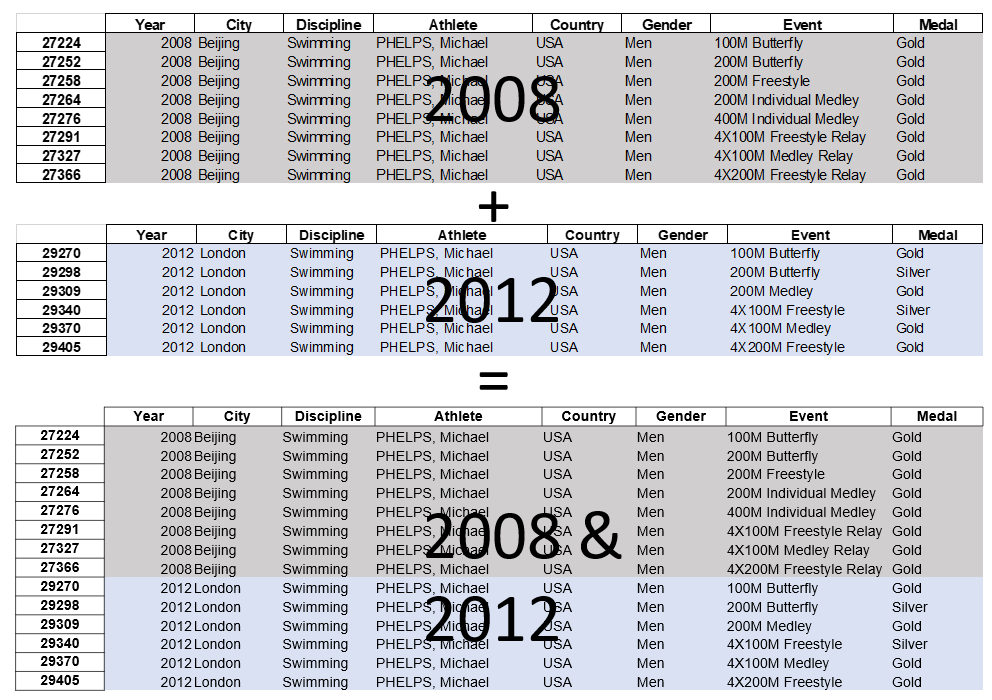

In [ ]:
men2004 = pd.read_csv("men2004.csv")

In [ ]:
men2004

In [ ]:
men2008 = pd.read_csv("men2008.csv")

In [ ]:
men2008

In [ ]:
men2004.append(men2008, ignore_index= True)

In [ ]:
men0408 = pd.concat([men2004, men2008], ignore_index=False, keys = [2004, 2008], names = ["Year"])

In [ ]:
men0408 

In [ ]:
men0408.reset_index().drop(columns = "level_1")

### Manipulating Elements in a DataFrame

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.head()

In [ ]:
titanic.loc[1, "age"] = 40
titanic.head()

In [ ]:
titanic.iloc[1, 3] = 41
titanic.head()

In [ ]:
titanic.loc[1:3, "age"] = 42
titanic.head()

In [ ]:
titanic.loc[:, "age"] = titanic.loc[:, "age"] * 12
titanic.head()

In [ ]:
titanic.loc[:, "age"] = titanic.loc[:, "age"] / 12
titanic.head()

In [ ]:
index_babies = titanic.loc[titanic.age < 1].index
index_babies

In [ ]:
titanic.loc[index_babies]

In [ ]:
titanic.loc[titanic.age < 1, "age"] = 1

In [ ]:
titanic.loc[index_babies]